# Train a very simple CNN given two different datasets (fashionMNIST, liveness)

- Read different dataset depending on the option (fashionMNIST, liveness)
    - Define custom dataset first
    - Explore how the dataset is made
    - Make a train_loader
    - Plot images, the whole bach of them
- Define the model
- Train with some kind of simple output
- Eval with a confusion matrix or other metric

In [1]:
DATASET_OPTS = ["fashionMNIST", "liveness"]
DATASET = DATASET_OPTS[1]

import torch


import torchvision
import torchvision.transforms as transforms

### Read different dataset depending on the option (fashionMNIST, liveness)

- Define custom dataset first (in another py file)

In [2]:
if DATASET == "fashionMNIST":
    train_dataset = torchvision.datasets.FashionMNIST(
        root="data/",
        train=True,
        transform=transforms.ToTensor(),
        download=True)
else:
    from liveness_simple_dataset import LivenessDataset
    train_dataset = LivenessDataset(
        root = "/mnt/data/third_p_simple_dataset/casia/"
    )
    

In [3]:
print(dir(train_dataset))

['__add__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'class_to_idx', 'classes', 'images_fns', 'img_dim', 'root', 'targets']


In [4]:
train_dataset.classes

['spoof', 'live']

In [5]:
#train_dataset.data.shape # should not use anymore train_data nor test_data, thoser are deprecated

In [6]:
print(train_dataset.targets)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [7]:
train_dataset.class_to_idx

{'spoof': 0, 'live': 1}

- Make a train_loader
- Plot images, the whole bach of them

In [8]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                              batch_size=32,
                                              shuffle=True)

for inputs, targets in train_loader:
    for img, y in zip(inputs, targets):       
        print(transforms.ToPILImage()(img))
        print(y)
        break
    break


<PIL.Image.Image image mode=RGB size=416x416 at 0x7F385B88A100>
tensor(0)


In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
# this function will be a life saver
def plot_image_mosaic(images, labels = None, n_columns = 8):
    fig = plt.figure(figsize=(20,16))
    fig.tight_layout()

    #fig.subplots_adjust(bottom=4) # or whatever

    for i, image in enumerate(images):
        ax = plt.subplot(len(images) / n_columns + 1, n_columns, i + 1)
        if labels is not None:
            ax.title.set_text(labels[i])
        plt.imshow(image)

<ipython-input-9-8df250e8bc3d>:11: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = plt.subplot(len(images) / n_columns + 1, n_columns, i + 1)


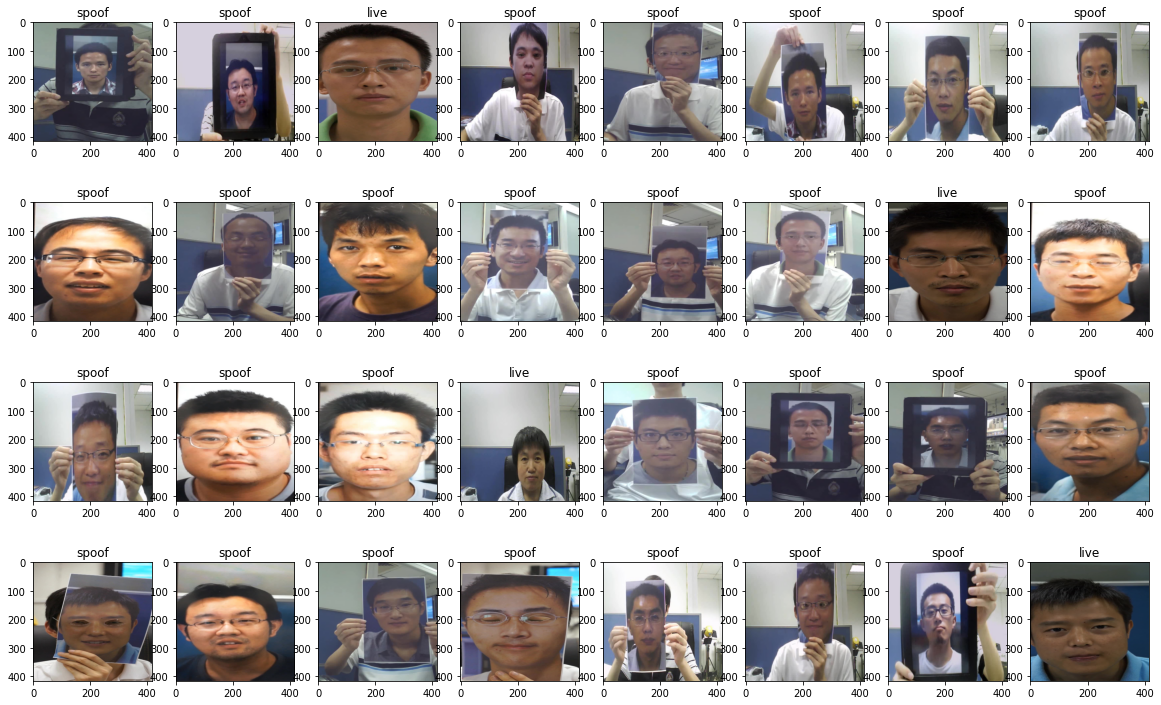

In [10]:
for inputs, targets in train_loader:
    batch_images = [transforms.ToPILImage()(img) for img in inputs]
    #print(inputs[0].shape)
    #break
    batch_labels = [train_dataset.classes[y] for y in targets]
    #for img, y in zip(inputs, targets):       
    #    print(transforms.ToPILImage()(img))
    #    print(y)
    #    break
    plot_image_mosaic(batch_images, batch_labels)
    break

### Define the model

In [ ]:
class CNN_Basic(nn.Module):
    
    def __init__(self, K):
        super(CNN_Basic, self).__init__()
        
        # TODO, how to define in_channels according to the image no. channels?
        self.conv_layers = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=2), # 32 filters, dont need to define w, h
            nn.ReLU(),
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=2), # 32 filters
            nn.ReLU(),
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=2), # 32 filters
            nn.ReLU()
        )
   